In [2]:
!python -m pip install googlemaps


  Running setup.py bdist_wheel for googlemaps: started
  Running setup.py bdist_wheel for googlemaps: finished with status 'done'
  Stored in directory: C:\Users\Prasanth_HP\AppData\Local\pip\Cache\wheels\3c\3f\25\ce6d7722dba07e5d4a12d27ab38f3d7add65ef43171b02c819
Successfully built googlemaps


In [17]:
import numpy as np                                                               #linear algebra
import pandas as pd                                                              #data processing and accessing i/o csv files
import pandas_profiling as pp
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

travel_time = pd.read_csv("https://raw.githubusercontent.com/Madhavi1109/term1/master/Travel_Times.csv") #travel times
travel_time_daily = pd.read_csv("https://raw.githubusercontent.com/Madhavi1109/term1/master/Travel_Times_Daily.csv") # DTT
time_of_travel = pd.read_csv("https://raw.githubusercontent.com/Madhavi1109/term1/master/Travel_Times_time_of_day.csv") #TOD times
wards = pd.read_csv("https://raw.githubusercontent.com/Madhavi1109/term1/master/wards.csv") #wards
weekly_travel_time = pd.read_csv("https://raw.githubusercontent.com/Madhavi1109/term1/master/Travel_Times_day_of_week.csv") #Week

                                                            # read the first 5 lines of the data
print(travel_time.info())                                            
print(travel_time_daily.info())                                                      
print(time_of_travel.info())                                                                  
print(wards.info())                                                      
print(weekly_travel_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
Origin Movement ID                           198 non-null int64
Origin Display Name                          198 non-null object
Destination Movement ID                      198 non-null int64
Destination Display Name                     198 non-null object
Date Range                                   198 non-null object
Mean Travel Time (Seconds)                   198 non-null int64
Range - Lower Bound Travel Time (Seconds)    198 non-null int64
Range - Upper Bound Travel Time (Seconds)    198 non-null int64
dtypes: int64(5), object(3)
memory usage: 12.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 23 columns):
Date                                                       31 non-null object
Origin Movement ID                                         31 non-null int64
Origin Display Name                                        31 non-n

In [99]:
travel_time.head(1)

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",1,"Unnamed Road, Bengaluru","1/1/2018 - 1/31/2018, Every day, Daily Average",2600,1885,3585


In [3]:
travel_time_daily.head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,PM Range - Upper Bound Travel Time (Seconds),Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds)
0,01/01/2018,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka",2289,1660,3157,1760,1392,...,3442.0,2329,1854,2926,2229,1593,3117,2116,1483,3019
1,01/02/2018,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka",2922,1963,4348,3286,2532,...,4868.0,2962,2351,3733,2445,1651,3622,1723,1280,2320
2,01/03/2018,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka",3014,2017,4504,3347,2670,...,5156.0,3099,2654,3618,3117,2158,4503,1722,1269,2338
3,01/04/2018,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka",3014,1973,4604,3085,2300,...,4322.0,3592,2799,4609,2805,1842,4272,1468,1189,1813
4,01/05/2018,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka",3156,2215,4498,3350,2539,...,4918.0,3046,2582,3593,2827,2010,3977,1495,1205,1854


In [4]:
time_of_travel.head()

,Time Of Day,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,Daily Average,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Every day",NaN,NaN,NaN
1,AM Peak,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Every day",3187.0,2216.0,4584.0
2,Midday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Every day",2907.0,2216.0,3813.0
3,PM Peak,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Every day",3482.0,2604.0,4656.0
4,Evening,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Every day",2574.0,1810.0,3661.0


In [5]:
wards.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,110,2,10,2756.07,613.98,2692.91,1.24
1,110,2,15,2737.33,588.06,2681.05,1.22
2,110,2,20,2676.85,491.72,2634.26,1.19
3,110,3,9,2779.31,521.97,2732.20,1.20
4,110,3,14,2862.21,687.02,2787.73,1.25


In [6]:
weekly_travel_time.head()

,Day Of Week,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,Monday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Daily Average",2695,1804,4024
1,Tuesday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Daily Average",2995,2025,4429
2,Wednesday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Daily Average",3207,2152,4781
3,Thursday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Daily Average",2987,1927,4630
4,Friday,89,"0 Museum Road, Shanthala Nagar, Ashok Nagar, B...",169,"Whitefield, Bengaluru, Karnataka","1/1/2018 - 1/31/2018, Daily Average",2953,1995,4372


In [82]:
avg_travel_time = travel_time[(travel_time['Origin Movement ID'] == 89) & (travel_time['Destination Movement ID'] == 169)]
print(avg_travel_time)

     Origin Movement ID                                Origin Display Name  \
168                  89  0 Museum Road, Shanthala Nagar, Ashok Nagar, B...   

     Destination Movement ID            Destination Display Name  \
168                      169  M4, Phase 1, Whitefield, Bengaluru   

                                         Date Range  \
168  1/1/2018 - 1/31/2018, Every day, Daily Average   

     Mean Travel Time (Seconds)  Range - Lower Bound Travel Time (Seconds)  \
168                        2773                                       1874   

     Range - Upper Bound Travel Time (Seconds)  
168                                       4101  


In [11]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(weekly_travel_time)
profile.to_file(outputfile="weekly_travel_time.html")

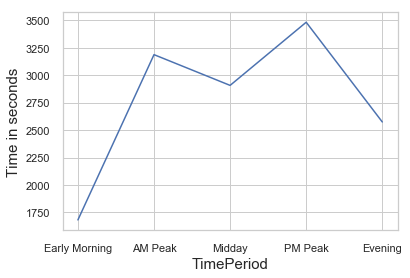

In [34]:
#X Values
x=['Early Morning','AM Peak','Midday','PM Peak','Evening']
y=[1682,3187,2907,3482,2574]
plt.xlabel("TimePeriod", fontsize=15)
plt.ylabel("Time in seconds",fontsize=15)
plt.plot(x,y)

#sns.countplot(x='Time Of Day', data=time_of_travel).set_title('Count plot for survived.')
plt.show()



In [74]:
hod=wards[(wards['sourceid'] == 169) & (wards['dstid'] == 89)].hod
mean_travel_time=wards[(wards['sourceid'] == 169) & (wards['dstid'] == 89)].mean_travel_time
print(tt,mean_travel_time)

658      3
659      8
660     13
661     18
662     23
2134     0
2135     5
2136    10
2137    15
2138    20
3606     4
3607     9
3608    14
3609    19
5091     1
5092     6
5093    11
5094    16
5095    21
6574     2
6575     7
6576    12
6577    17
6578    22
Name: hod, dtype: int64 658     1538.33
659     3816.77
660     3047.67
661     4185.02
662     1855.95
2134    1596.07
2135    1520.28
2136    3450.23
2137    3320.43
2138    3114.99
3606    1511.15
3607    3585.90
3608    2951.56
3609    3726.36
5091    1546.54
5092    2021.60
5093    3407.44
5094    3812.23
5095    2662.19
6574    1602.37
6575    2992.88
6576    3283.04
6577    4104.92
6578    2306.65
Name: mean_travel_time, dtype: float64


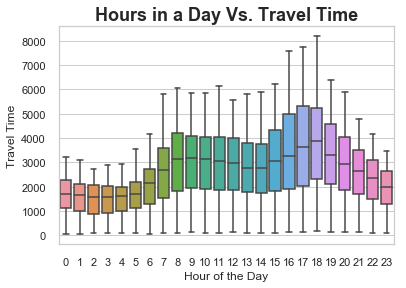

In [79]:
#hours_of_day=list(range(0, 24))
#print(hours_of_day)
sns.boxplot(x = 'hod', y = 'mean_travel_time' , data =wards)
#mean_travel_time=wards[(wards['sourceid'] == 169) & (wards['dstid'] == 89)].mean_travel_time
#sns.violinplot(x="hod", y="mean_travel_time", palette="gnuplot", data=wards)
plt.xlabel("Hour of the Day")
plt.ylabel("Travel Time")
plt.title("Hours in a Day Vs. Travel Time", fontsize=18, fontweight = "bold")
plt.show()

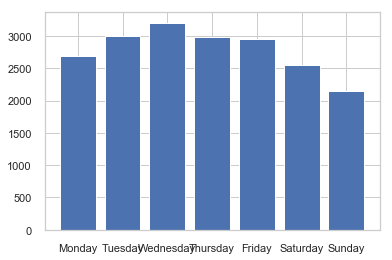

In [98]:
#plt.bar(x=np.arange(1,20),height=50)
x=weekly_travel_time['Day Of Week']
y=weekly_travel_time['Mean Travel Time (Seconds)']
plt.bar(x,y)
plt.show()
#weekdays=weekly_travel_time[].Day Of Week
#print(weekdays)
#ax = sns.violinplot(x="Day Of Week", y="Mean Travel Time (Seconds)", palette="gnuplot", data=weekly_travel_time)
# plt.bar(index, no_movies)
  
#plt.xlabel("If they go for treatment or not?")
#plt.ylabel("AgeGroup")
#plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")